In [45]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 70.9/70.9 MB 5.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import gc

import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, mean_squared_error, accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, roc_curve
from tqdm import tqdm

In [3]:
train = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/train.csv',encoding='utf-8')
test = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/test.csv')
songs = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/songs.csv')
songs_extra = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/song_extra_info.csv',encoding='utf-8')
members = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/members.csv')
sample = pd.read_csv('C:/Users/kamalesh k b/Downloads/kkbox-music-recommendation-challenge/sample_submission.csv')

In [4]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [6]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
print(songs.info() ,"\n")
print(members.info() ,"\n")
print(songs_extra.info(), "\n")
print(train.info() ,"\n")
print(test.info() ,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes:

In [10]:
merge_songs_train = pd.merge(songs, train, on='song_id', how='left')
merge_songs_train_sextra = pd.merge(merge_songs_train, songs_extra, on='song_id', how='left')
songs = pd.merge(merge_songs_train_sextra, members, on='msno', how='left')


In [11]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,msno,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0.0,焚情,TWB531410010,1.0,0.0,NaN,9.0,20141125.0,20180417.0
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,1.0,焚情,TWB531410010,1.0,0.0,NaN,7.0,20110705.0,20171005.0
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,0.0,焚情,TWB531410010,15.0,0.0,NaN,3.0,20131030.0,20170609.0
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,1.0,焚情,TWB531410010,1.0,0.0,NaN,7.0,20110831.0,20170908.0
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,0.0,焚情,TWB531410010,5.0,35.0,female,3.0,20130505.0,20190412.0


In [12]:
songs.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9313710 entries, 0 to 9313709
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   song_id                 object 
 1   song_length             int64  
 2   genre_ids               object 
 3   artist_name             object 
 4   composer                object 
 5   lyricist                object 
 6   language                float64
 7   msno                    object 
 8   source_system_tab       object 
 9   source_screen_name      object 
 10  source_type             object 
 11  target                  float64
 12  name                    object 
 13  isrc                    object 
 14  city                    float64
 15  bd                      float64
 16  gender                  object 
 17  registered_via          float64
 18  registration_init_time  float64
 19  expiration_date         float64
dtypes: float64(7), int64(1), object(12)
memory usage: 1.5+ GB


In [14]:
songs.shape

(9313710, 20)

<Axes: >

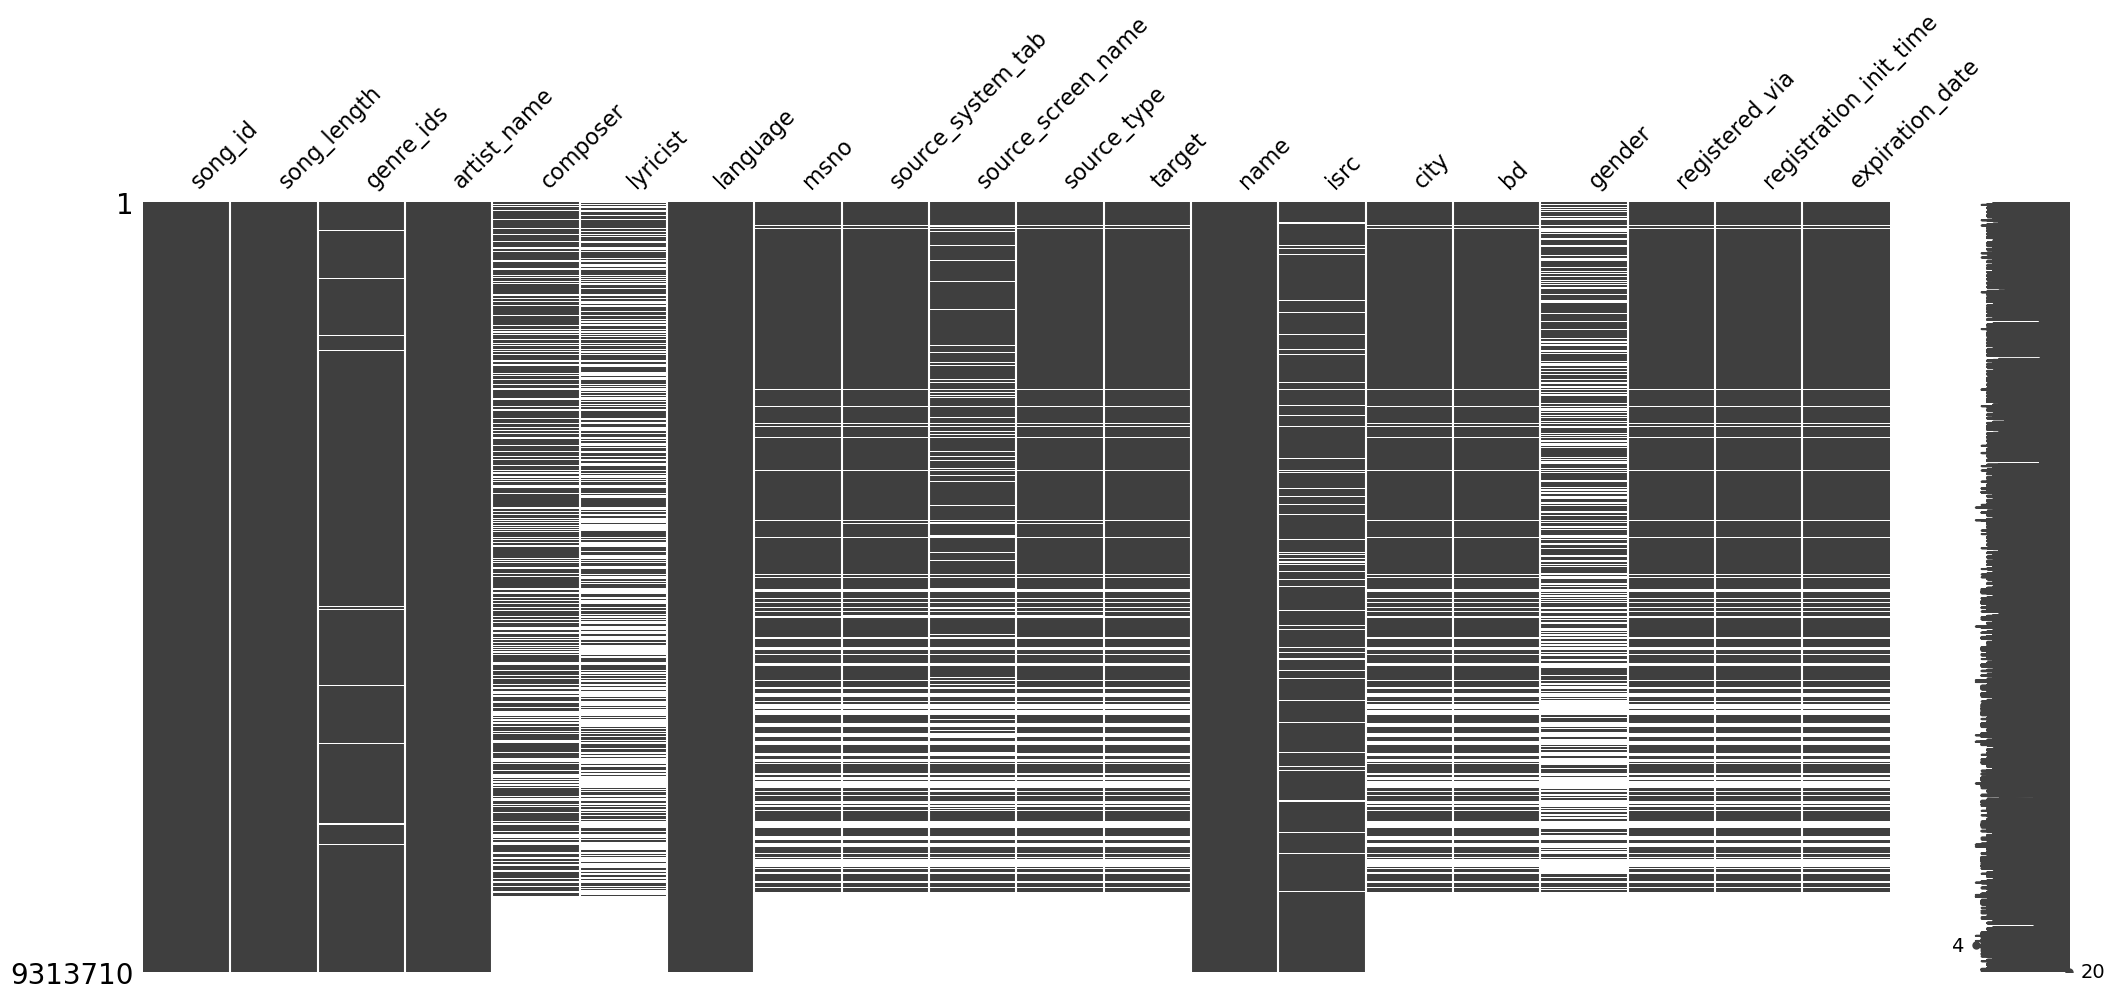

In [12]:
msno.matrix(songs)

In [13]:
# String with 'Unknown'
for i in songs.select_dtypes(include=['object']).columns:
    songs[i] = songs[i].fillna(value = "unknown")
# Numerics with mean    
for i in songs.select_dtypes(exclude=['object']).columns:
    songs[i] = songs[i].fillna(value = songs[i].mean())

In [14]:
songs.isna().sum()

song_id                   0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
msno                      0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [15]:
# Convert 'registration_init_time' to datetime
songs['registration_init_time'] = pd.to_datetime(songs['registration_init_time'], format='%Y%m%d', errors='coerce')
songs['registration_init_time_year'] = songs['registration_init_time'].dt.year.fillna(0).astype(int)
songs['registration_init_time_month'] = songs['registration_init_time'].dt.month.fillna(0).astype(int)
songs['registration_init_time_day'] = songs['registration_init_time'].dt.day.fillna(0).astype(int)

# Convert 'expiration_date' to datetime
songs['expiration_date'] = pd.to_datetime(songs['expiration_date'], format='%Y%m%d', errors='coerce')
songs['expiration_date_year'] = songs['expiration_date'].dt.year.fillna(0).astype(int)
songs['expiration_date_month'] = songs['expiration_date'].dt.month.fillna(0).astype(int)
songs['expiration_date_day'] = songs['expiration_date'].dt.day.fillna(0).astype(int)

In [16]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,msno,source_system_tab,source_screen_name,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,...,unknown,9.0,2014-11-25,2018-04-17,2014,11,25,2018,4,17
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,...,unknown,7.0,2011-07-05,2017-10-05,2011,7,5,2017,10,5
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,...,unknown,3.0,2013-10-30,2017-06-09,2013,10,30,2017,6,9
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,...,unknown,7.0,2011-08-31,2017-09-08,2011,8,31,2017,9,8
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,...,female,3.0,2013-05-05,2019-04-12,2013,5,5,2019,4,12


In [2]:
!pip install vaex

Defaulting to user installation because normal site-packages is not writeable


In [17]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()

for i in songs.columns :
    songs[i] = label_encoder.fit_transform(songs[i])

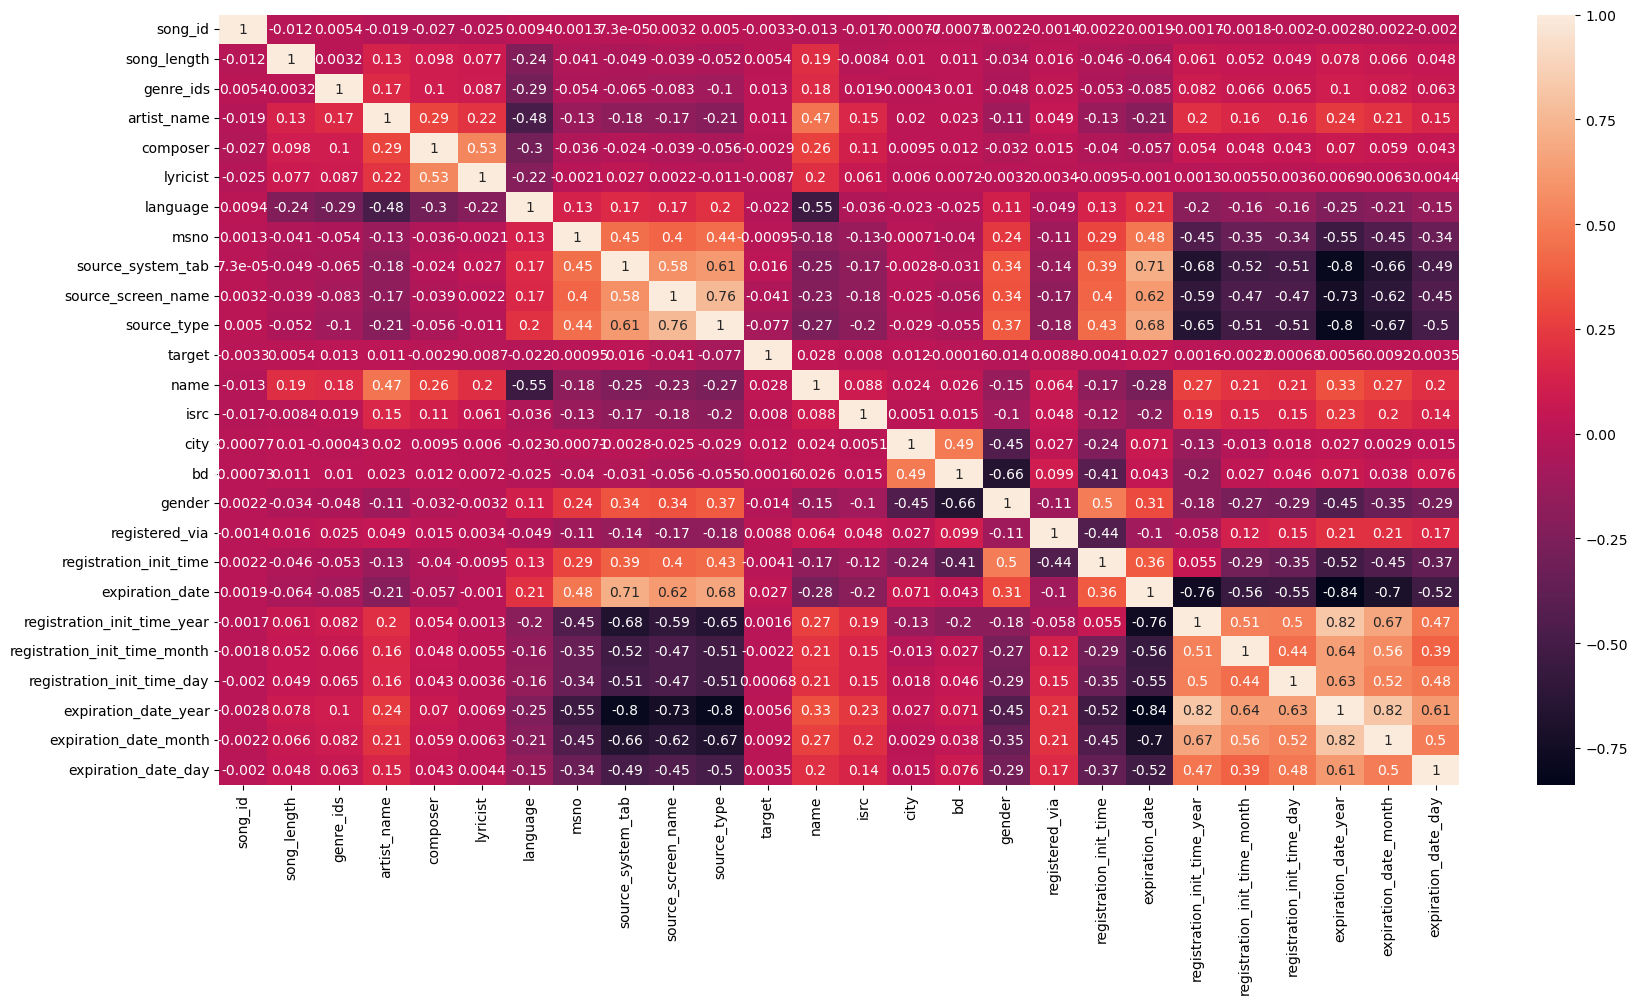

In [18]:
plt.figure(figsize=[20,10])
sns.heatmap(songs.corr(), annot=True)
plt.show()

In [2]:
import vaex

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.0.2/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.0.2/u/import-error

In [19]:
x = songs.drop('target', axis = 1)
y = songs.target
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.30)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6519597, 25)
(6519597,)
(2794113, 25)
(2794113,)


In [35]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DT_TrainScore = DT.score(x_train, y_train)
DT_TrainScore

1.0

In [36]:
DT_TestScore = DT.score(x_val,y_val)
DT_TestScore

0.7181681628481025

In [37]:
val_pred = DT.predict(x_val)

In [38]:
print(classification _report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64   1099617
           1       1.00      1.00      1.00    580705
           2       0.65      0.65      0.65   1113791

    accuracy                           0.72   2794113
   macro avg       0.76      0.76      0.76   2794113
weighted avg       0.72      0.72      0.72   2794113



In [27]:
"""cm_rf = confusion_matrix(y_val, val_pred)
sns.heatmap(cm_rf, annot=True, fmt='g')"""

"cm_rf = confusion_matrix(y_val, val_pred)\nsns.heatmap(cm_rf, annot=True, fmt='g')"

In [54]:
XGB = xgb.XGBClassifier()

In [ ]:
XGB.fit(x_train,y_train)

XGB_TrainScore = XGB.score(x_train, y_train)
print(XGB_TrainScore)
XGB_TestScore = XGB.score(x_val,y_val)
print(XGB_TestScore)

In [ ]:
val_pred = XGB.predict(x_val)

In [ ]:
print(classification_report(y_val, val_pred))

In [ ]:
"""cm_rf = confusion_matrix(y_val, val_pred)
sns.heatmap(cm_rf, annot=True, fmt='g')"""

In [32]:
"""def model_with(model_name, X_train, X_val, y_train, y_val) :
    print("==================================================")
    print("Modeling with :", model_name)
    print()
    
    if model_name == "Decision Tree Classifier" :
        model = DecisionTreeClassifier()
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreeClassifier()
    elif model_name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000,
        )
    elif model_name == "LightGBM Classifier" :
        model = lgbm.LGBMClassifier(
            n_estimators=1000,
        )
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000,
        )
    elif model_name == "CatBoost Classifier" :
        model = cb.CatBoostClassifier(
            n_estimators=1000,
            verbose=0
        )
    else :
        print("Model not found in function.")
        
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_val)
    print(classification_report(y_val, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_val, val_pred))
    #print("ROC :", roc_auc_score(y_val, val_pred),multi_class='ovo')
    
    print("==================================================")
    print()"""

In [34]:
"""models = ["Decision Tree Classifier", "Extra Trees Classifier", "Random Forest Classifier", "LightGBM Classifier", "XGBoost Classifier", "CatBoost Classifier"]
for i in models :
    model_with(i, x_train, x_val, y_train, y_val)"""

'models = ["Decision Tree Classifier", "Extra Trees Classifier", "Random Forest Classifier", "LightGBM Classifier", "XGBoost Classifier", "CatBoost Classifier"]\nfor i in models :\n    model_with(i, x_train, x_val, y_train, y_val)'